In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Epoch 1/100
575/575 [==============================] - 5s 8ms/step - loss: 1.8622 - accuracy: 0.2397 - val_loss: 1.7985 - val_accuracy: 0.2717
Epoch 2/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8170 - accuracy: 0.2476 - val_loss: 1.7977 - val_accuracy: 0.2717
Epoch 3/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8163 - accuracy: 0.2478 - val_loss: 1.7962 - val_accuracy: 0.2717
Epoch 4/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8158 - accuracy: 0.2476 - val_loss: 1.7986 - val_accuracy: 0.2717
Epoch 5/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8154 - accuracy: 0.2477 - val_loss: 1.7957 - val_accuracy: 0.2717
Epoch 6/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8145 - accuracy: 0.2478 - val_loss: 1.7972 - val_accuracy: 0.2719
Epoch 7/100
575/575 [==============================] - 4s 7ms/step - loss: 1.8137 - accuracy: 0.2478 - val_loss: 1.7969 - val_accuracy: 0.2719

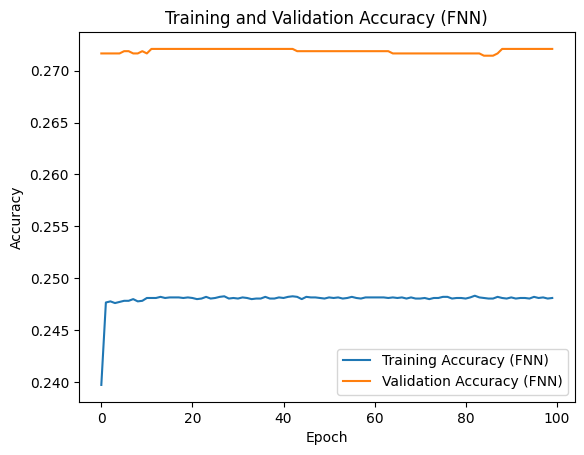

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img.flatten())  # Flatten the image
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
root_dir = '/kaggle/input/emotion-detection-fer'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(train_dir))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the Feedforward Neural Network (FNN) model
model_fnn = Sequential()
model_fnn.add(Flatten(input_shape=(48*48,)))
model_fnn.add(Dense(256, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(128, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_fnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_fnn = model_fnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_fnn, test_accuracy_fnn = model_fnn.evaluate(X_test, y_test)
print(f'Test Accuracy (FNN): {test_accuracy_fnn}')

# Visualize training history
plt.plot(history_fnn.history['accuracy'], label='Training Accuracy (FNN)')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy (FNN)')
plt.title('Training and Validation Accuracy (FNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
